## Introduction

We will create a super resolution model from scratch to enhance the image quality

## Setting up Environment

### Upgrade Libraries

In [1]:
#!pip install opencv-contrib-python --upgrade

In [ ]:
import cv2
cv2.__version__

'4.11.0'

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

### Set up our dataset

In [5]:
# Load the image
dir_dataset = r"C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training" # change to your path

files_img = [os.path.join(dir_dataset, x) for x in os.listdir(dir_dataset)]

In [6]:
len(files_img), files_img[0: 92219]

(11,
 ['C:\\Users\\omarh\\Documents\\College\\Year 4 Term 2\\Final-Year-Project\\fruit\\training\\Apple 6',
  'C:\\Users\\omarh\\Documents\\College\\Year 4 Term 2\\Final-Year-Project\\fruit\\training\\Apple Braeburn 1',
  'C:\\Users\\omarh\\Documents\\College\\Year 4 Term 2\\Final-Year-Project\\fruit\\training\\Apple Crimson Snow 1',
  'C:\\Users\\omarh\\Documents\\College\\Year 4 Term 2\\Final-Year-Project\\fruit\\training\\Apple Golden 1',
  'C:\\Users\\omarh\\Documents\\College\\Year 4 Term 2\\Final-Year-Project\\fruit\\training\\Apple Golden 2',
  'C:\\Users\\omarh\\Documents\\College\\Year 4 Term 2\\Final-Year-Project\\fruit\\training\\Apple Golden 3',
  'C:\\Users\\omarh\\Documents\\College\\Year 4 Term 2\\Final-Year-Project\\fruit\\training\\Apple Granny Smith 1',
  'C:\\Users\\omarh\\Documents\\College\\Year 4 Term 2\\Final-Year-Project\\fruit\\training\\Apple Pink Lady 1',
  'C:\\Users\\omarh\\Documents\\College\\Year 4 Term 2\\Final-Year-Project\\fruit\\training\\Apple Red 1'

Displaying the first image: C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\Apple 6\r0_0_100.jpg


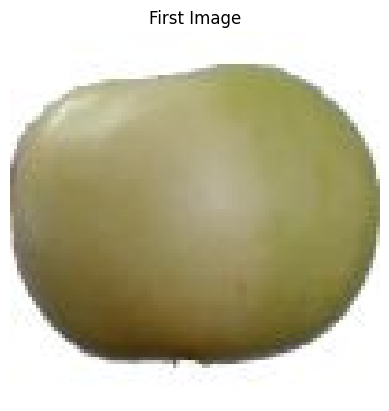

In [7]:
# Display the first image

folder_path = r"C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\Apple 6"  # Local path

# Get a list of image files
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]

# Display the first image
if image_files:
    first_image_path = image_files[0]
    img = cv2.imread(first_image_path, cv2.IMREAD_UNCHANGED)
    if img is not None:
        print(f"Displaying the first image: {first_image_path}")
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title("First Image")
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not load the image: {first_image_path}")
else:
    print("No image files found in the folder.")



### Downsample images

> Here we are going to write some downsampling code through which we are going to generate some low resolution images

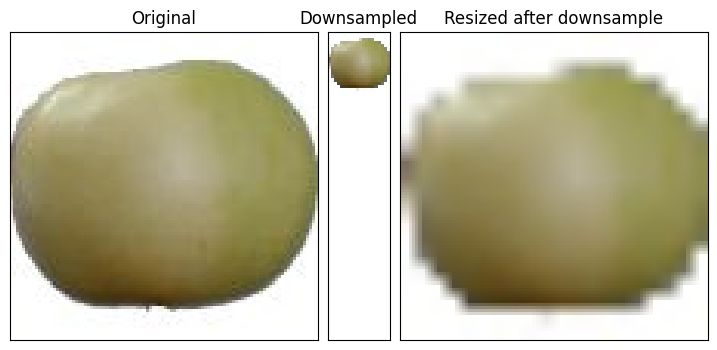

In [9]:
def plot_images(images, titles, figsize, rows=1, cols=1, axes_pad=(0.1, 0.5)):
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111, nrows_ncols=(rows, cols), axes_pad=axes_pad)

    for ax, img, title in zip(grid, images, titles):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

def downsample(img_file, scale=0.3):
    img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)

    if img is None:
        print(f"Error: Could not load image at path: {img_file}")
        return None, None

    width = int(img.shape[1] * scale)
    height = int(img.shape[0] * scale)
    img_small = cv2.resize(img, (width, height), interpolation=cv2.INTER_NEAREST)
    return img, img_small

# ✅ Use raw string for local path to avoid escape issues
folder_path = r"C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\Apple 6"

image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]

# Display first image for testing
for image_file in image_files[:1]:
    img, img_small = downsample(image_file, scale=0.2)
    if img is not None and img_small is not None:
        resized_img = cv2.resize(img_small, (img.shape[1], img.shape[0]))
        plot_images([img, img_small, resized_img],
                    ['Original', 'Downsampled', 'Resized after downsample'],
                    figsize=(10, 4), cols=3)
    else:
        print(f"Skipping due to image load error: {image_file}")


### Lets downsample all images for training

In [11]:

def plot_images(images, titles, figsize, rows=1, cols=1, axes_pad=(0.1, 0.5)):
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111, nrows_ncols=(rows, cols), axes_pad=axes_pad)

    for ax, img, title in zip(grid, images, titles):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis('off')
    plt.show()

def downsample(img_file, scale=0.3):
    img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)

    if img is None:
        print(f"Error: Could not load image at path: {img_file}")
        return None, None

    width = int(img.shape[1] * scale)
    height = int(img.shape[0] * scale)
    img_small = cv2.resize(img, (width, height), interpolation=cv2.INTER_NEAREST)
    return img, img_small

# ✅ Local paths (use raw string or double backslashes to avoid escape issues)
input_folder_path = r"C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\Apple 6"
output_folder_path = r'C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\apple_lr_train'

# Create output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Get list of image files
image_files = [os.path.join(input_folder_path, file)
               for file in os.listdir(input_folder_path)
               if os.path.isfile(os.path.join(input_folder_path, file))]

# Process and save
for image_file in image_files:
    img, img_small = downsample(image_file, scale=0.2)  # control downsampling scale

    if img is not None and img_small is not None:
        filename = os.path.basename(image_file)
        output_path = os.path.join(output_folder_path, filename)
        cv2.imwrite(output_path, img_small)
        print(f"✅ Saved downsampled image to {output_path}")

        # Optional visualization (uncomment to show results)
        # resized_img = cv2.resize(img_small, (img.shape[1], img.shape[0]))
        # plot_images([img, img_small, resized_img], ['Original', 'Downsampled', 'Resized back'], figsize=(10, 4), cols=3)

    else:
        print(f"❌ Skipping due to image loading error: {image_file}")



✅ Saved downsampled image to C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\apple_lr_train\r0_0_100.jpg
✅ Saved downsampled image to C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\apple_lr_train\r0_112_100.jpg
✅ Saved downsampled image to C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\apple_lr_train\r0_129_100.jpg
✅ Saved downsampled image to C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\apple_lr_train\r0_156_100.jpg
✅ Saved downsampled image to C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\apple_lr_train\r0_157_100.jpg
✅ Saved downsampled image to C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\apple_lr_train\r0_158_100.jpg
✅ Saved downsampled image to C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\fruit\training\apple_lr_train\r0_160_100.jpg
✅ Saved downsampled im

In [12]:
dir_dataset_lr =  [os.path.join(output_folder_path, file) for file in os.listdir(output_folder_path) if os.path.isfile(os.path.join(output_folder_path, file))]
files_img_hr = [os.path.join(input_folder_path, file) for file in os.listdir(input_folder_path) if os.path.isfile(os.path.join(input_folder_path, file))]
print("HR images: {}, LR images: {}".format(len(files_img_hr), len(dir_dataset_lr)))

HR images: 200, LR images: 200


## Super Resolution - Model Creation

### SR GAN

In [13]:
#!pip install tensorflow

In [14]:
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, add, BatchNormalization, Activation, LeakyReLU, Layer
from tensorflow.keras.models import Model

In [15]:
class SubpixelConv2D(Layer):

    def __init__(self, upsampling_factor=2, **kwargs): #  refers to the instance of the class that is being operated on.
        super(SubpixelConv2D, self).__init__(**kwargs) #init the parent class and allows you to call methods of a parent class.
        self.upsampling_factor = upsampling_factor

    def build(self, input_shape):
        last_dim = input_shape[-1]
        factor = self.upsampling_factor * self.upsampling_factor
        if last_dim % (factor) != 0:
            raise ValueError('Channel ' + str(last_dim) + ' should be of integer times of upsampling_factor^2: ' +
                             str(factor) + '.')

    def call(self, inputs, **kwargs):
        return tf.nn.depth_to_space(inputs, self.upsampling_factor) # convert input from (h, w, c) to (h*r, w*r, c/(r*r)),

    def get_config(self):   # returns a dictionary that contains the configuration of the layer
        config = {'upsampling_factor': self.upsampling_factor}
        base_config = super(SubpixelConv2D, self).get_config()  #super() is a built-in function that allows you to call a method in a parent class(Layer).
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        factor = self.upsampling_factor * self.upsampling_factor

        input_shape_1 = None
        if input_shape[1] is not None:
            input_shape_1 = input_shape[1] * self.upsampling_factor

        input_shape_2 = None
        if input_shape[2] is not None:
            input_shape_2 = input_shape[2] * self.upsampling_factor

        dims = [ input_shape[0],   #batch size
                 input_shape_1,  # h
                 input_shape_2,  # w
                 int(input_shape[3]/factor)  #channel/factor
               ]
        return tuple( dims )

In [16]:
from tensorflow.keras.layers import Dense

# create a Dense layer with some configuration
dense_layer = Dense(units=64, activation='relu')

# get the configuration of the layer
config = dense_layer.get_config()
print(config)
# recreate the layer from the configuration
new_dense_layer = Dense.from_config(config)
# check that the two layers are equivalent
print(dense_layer.get_config() == new_dense_layer.get_config()) # should print True

{'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
True


In [17]:
config = {'upsampling_factor': 2}
base_config = {'config': 4}
print(dict(list(base_config.items()) + list(config.items())))

{'config': 4, 'upsampling_factor': 2}


In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
#from subpixel_conv_2d import SubpixelConv2D # assuming you have already imported this class

input_shape = (4, 4, 16)
upsampling_factor = 2

# create an input tensor
x = Input(shape=input_shape)

# apply a convolutional layer
x = Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)

# apply the SubpixelConv2D layer
X = SubpixelConv2D(upsampling_factor=upsampling_factor)(x)

# create the model
model = Model(inputs=x, outputs=X)

# print the output shape of the model
print(model.output_shape)

(None, 8, 8, 16)


### Generator

In [19]:
def generator_model(input_shape):
    # w_init = tf.random_normal_initializer(stddev=0.02)

    g_init = tf.random_normal_initializer(1., 0.02)
    relu = Activation('relu')

    layer_input = Input(shape=input_shape)
    # input shape 64 x 64 for generator
    #conv2d kernal size in  the paper (9,9)
    #activation function in the paper Prelu in the code we using relu
    # kernel_initializer='HeNormal   for initi  weight for conv2d  ( --- read about it ---)
    layer_past_block = Conv2D(64, (3,3), padding='SAME', activation= 'relu', kernel_initializer='HeNormal')(layer_input)
    # layer_initial = layer_past_block to save first layer information for sum at the end of residual blocks
    layer_initial = layer_past_block

    # B residual blocks
    for i in range(16):
        # in the paper they use  16 residual blocks
        layer = Conv2D(64, (3,3), padding='SAME', kernel_initializer='HeNormal')(layer_past_block)
        layer = BatchNormalization(gamma_initializer=g_init)(layer)

        layer = add([layer_past_block, layer])
        layer_past_block = layer

    layer = Conv2D(64, (3,3), padding='SAME', kernel_initializer='HeNormal')(layer_past_block)
    layer = BatchNormalization(gamma_initializer=g_init)(layer)
    layer = add([layer, layer_initial])  # adding initial layer, such that model can skip entire residual blocks
    # B residual blocks end

    #layer = layer_initial # extra

    layer = Conv2D(256, (3,3), padding='SAME', kernel_initializer='HeNormal')(layer)
    layer = SubpixelConv2D(upsampling_factor=2)(layer)
    layer = relu(layer)

    layer = Conv2D(256, (3,3), padding='SAME', kernel_initializer='HeNormal')(layer)
    layer = SubpixelConv2D(upsampling_factor=2)(layer)
    layer = relu(layer)

    #layer_final = Conv2D(3, (1,1), padding='SAME', kernel_initializer='HeNormal', activation= 'tanh')(layer)
    #kernal conv2d final layer kernal size 9x9 in the paper
    layer_final = Conv2D(3, (1,1), padding='SAME', kernel_initializer='HeNormal', activation= 'relu')(layer)

    model = Model(inputs=layer_input, outputs=layer_final, name="generator")
    return model

### Discriminator

In [20]:
# discriminator
def discriminator_model(input_shape):

    g_init= tf.random_normal_initializer(1., 0.02)

    ly_relu= LeakyReLU(alpha= 0.2)

    df_dim = 16

    layer_input = Input(input_shape)

    layer = Conv2D(64, (4, 4), (2, 2), padding='SAME', kernel_initializer='HeNormal')(layer_input)
    layer = ly_relu(layer)

    for i in range(2, 6):
        layer = Conv2D(df_dim*(2**i), (4, 4), (2, 2), padding='SAME', kernel_initializer='HeNormal')(layer)
        layer = ly_relu(layer)
        layer = BatchNormalization(gamma_initializer=g_init)(layer)

    layer = Conv2D(df_dim*16, (1, 1), (1, 1), padding='SAME', kernel_initializer='HeNormal')(layer)
    layer = ly_relu(layer)
    layer = BatchNormalization(gamma_initializer=g_init)(layer)

    layer = Conv2D(df_dim*8, (1, 1), (1, 1), padding='SAME', kernel_initializer='HeNormal')(layer)
    layer = BatchNormalization(gamma_initializer=g_init)(layer)
    layer_past = layer

    # Residual Block starts
    layer = Conv2D(df_dim*4, (3, 3), (1, 1), padding='SAME', kernel_initializer='HeNormal')(layer)
    layer = ly_relu(layer)
    layer = BatchNormalization(gamma_initializer=g_init)(layer)

    layer = Conv2D(df_dim*8, (3, 3), (1, 1), padding='SAME', kernel_initializer='HeNormal')(layer)
    layer = BatchNormalization(gamma_initializer= g_init)(layer)

    layer = add([layer, layer_past])
    # Residual Block ends

    layer = Flatten()(layer)
    layer_final = Dense(units=1, kernel_initializer='HeNormal', activation= 'sigmoid')(layer)
    model = Model(inputs=layer_input, outputs=layer_final, name="discriminator")

    return model

In [21]:
for i in range(2, 6):
  print(i)
  print("======")
  print(16*(2**i))

2
64
3
128
4
256
5
512


### VGG model

In [22]:
def vgg19_model(input_shape):
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
    # Create a model from input to layer 17 (layer index 0-16 included)
    model = Model(inputs=vgg.input, outputs=vgg.layers[16].output, name='vgg')
    return model

### Hyperparams

In [23]:
learning_rate = 0.0002

## Adversarial learning (SRGAN)
n_epoch = 10       ## overall training epochs
n_epoch_init = 5  ## initialize generator with Epochs
batch_size = 16    ## batch size for training
steps_per_epoch = 500

# create folders to save result images and trained models
img_save_dir = "samples"
checkpoint_dir = "models"


## low GPU memory test
# learning_rate = 0.0002

# ## Adversarial learning (SRGAN)
# n_epoch = 10         # total training epochs
# n_epoch_init = 5     # epochs to pretrain generator
# batch_size = 4       # lowered for low GPU (was 16)
# steps_per_epoch = 50  # optional: reduce steps if running out of time or memory

# # create folders to save result images and trained models
# img_save_dir = "samples"
# checkpoint_dir = "models"


#### Ensuring directories exist

In [24]:
if os.path.exists(img_save_dir):
    shutil.rmtree(img_save_dir)

os.makedirs(img_save_dir)

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

### Datasets Iterator

In [25]:
# Set paths to the folders containing sub folder with images
dir_dataset_lr = os.path.join(output_folder_path, 'sub_dir')
dir_dataset_hr = os.path.join(input_folder_path, 'sub_dir')

batch_size = 32

# Dataset from folders
dataset_lr = tf.keras.utils.image_dataset_from_directory(
    output_folder_path,  # not the class_a folder, just the root
    labels=None,
    image_size=(64, 64),
    batch_size=batch_size,
    shuffle=False
)

dataset_hr = tf.keras.utils.image_dataset_from_directory(
    input_folder_path,
    labels=None,
    image_size=(256, 256),
    batch_size=batch_size,
    shuffle=False
)

# Zip LR and HR
dataset = tf.data.Dataset.zip((dataset_lr, dataset_hr))


Found 200 files.
Found 200 files.


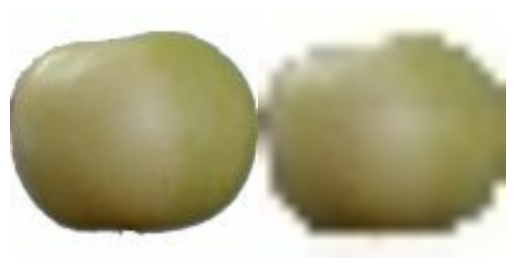

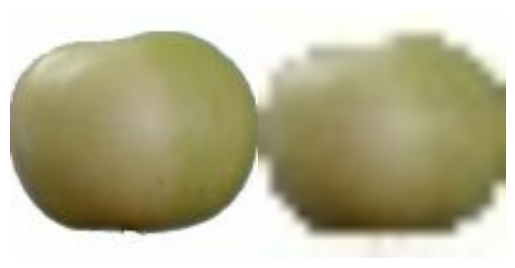

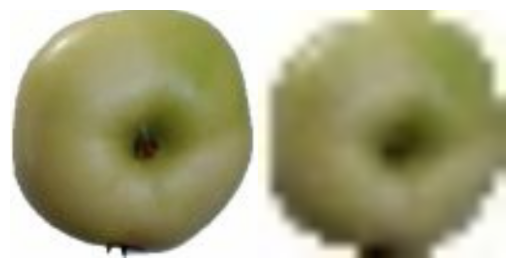

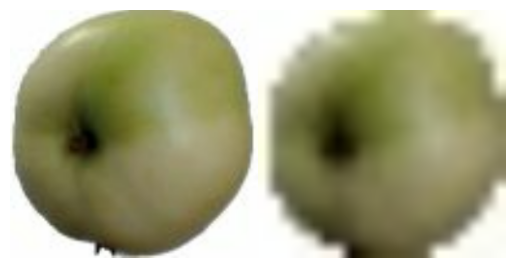

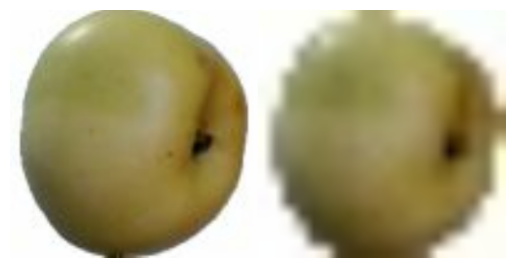

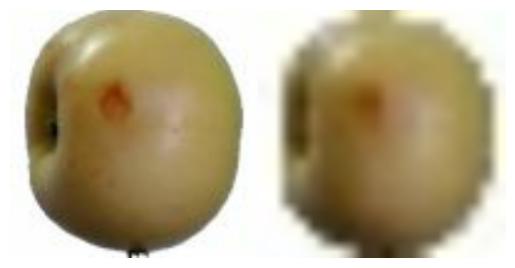

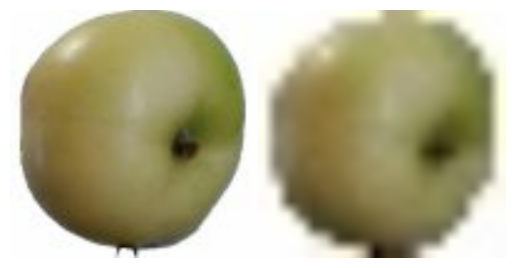

In [27]:
# code to verify that img_batch_lr and img_batch_hr are in sync
i = 0
for img_batch_lr, img_batch_hr in dataset:
    img_hr = img_batch_hr[0].numpy()
    img_lr = img_batch_lr[0].numpy()

    # تأكد أن الصور في النطاق الصحيح (0-255) قبل العرض إذا لزم الأمر
    img_lr_resize = cv2.resize(img_lr, (img_hr.shape[1], img_hr.shape[0]))

    # إذا كانت الصورة أحادية القناة، حولها إلى 3 قنوات لسهولة العرض
    if img_hr.ndim == 2:
        img_hr = cv2.cvtColor(img_hr, cv2.COLOR_GRAY2RGB)
    if img_lr_resize.ndim == 2:
        img_lr_resize = cv2.cvtColor(img_lr_resize, cv2.COLOR_GRAY2RGB)

    combined = np.hstack([img_hr, img_lr_resize])

    plt.imshow(combined.astype(np.uint8))
    plt.axis('off')
    plt.show()

    if i > 6:
        break
    i += 1


### Initialization

In [28]:
model_gen = generator_model((64, 64, 3))
model_dis = discriminator_model((256, 256, 3))
model_vgg = vgg19_model((256, 256, 3))

c:\Users\omarh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [29]:
g_optimizer_init = tf.optimizers.Adam(learning_rate)
g_optimizer = tf.optimizers.Adam(learning_rate)
d_optimizer = tf.optimizers.Adam(learning_rate)

### Initialize Generator

Lets give generator head start by letting it train alone for some steps

HR shape: (256, 256, 3), LR shape: (64, 64, 3)


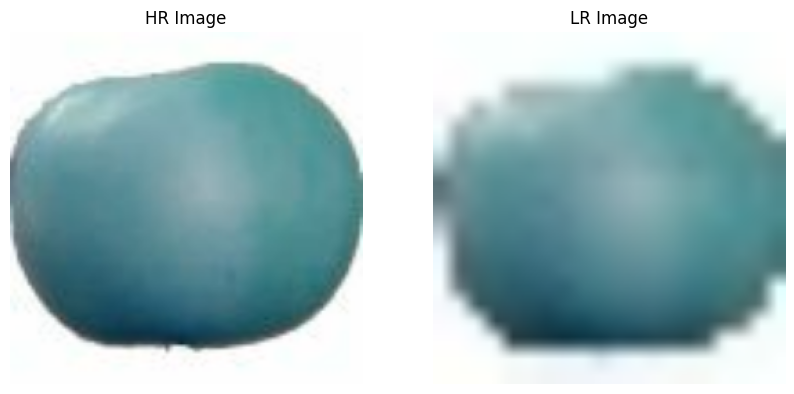

HR shape: (256, 256, 3), LR shape: (64, 64, 3)


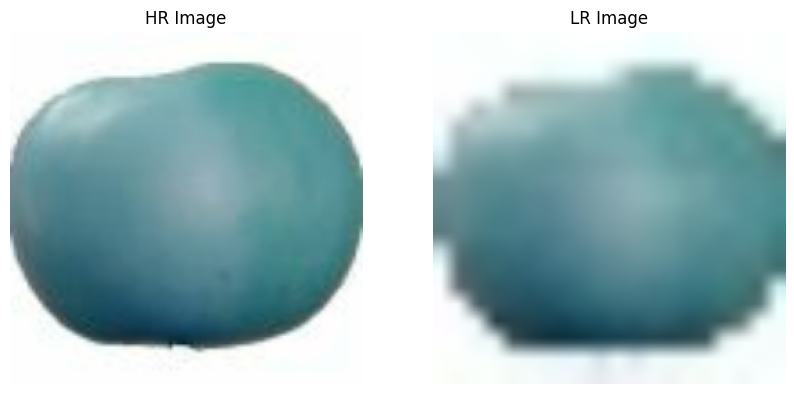

HR shape: (256, 256, 3), LR shape: (64, 64, 3)


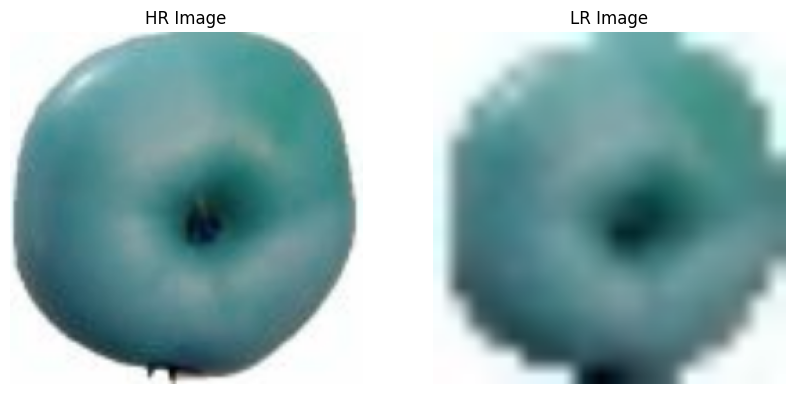

HR shape: (256, 256, 3), LR shape: (64, 64, 3)


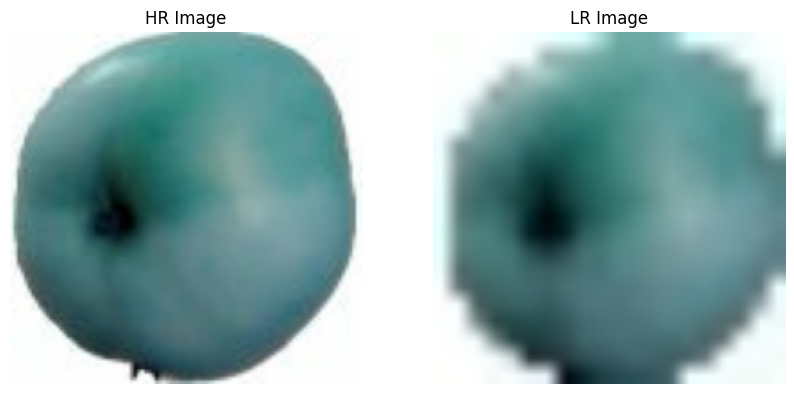

HR shape: (256, 256, 3), LR shape: (64, 64, 3)


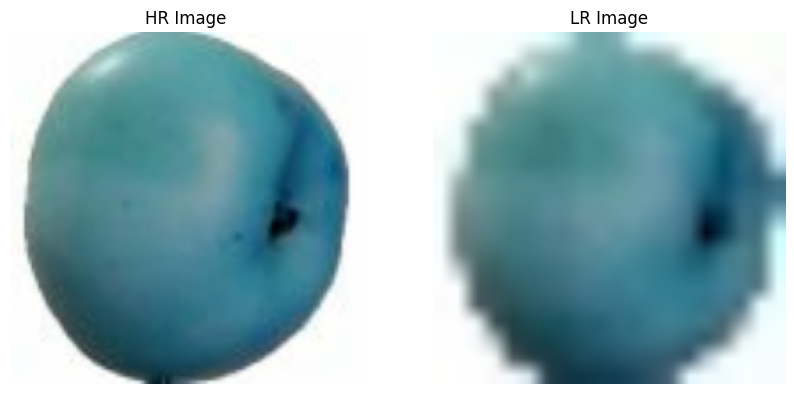

HR shape: (256, 256, 3), LR shape: (64, 64, 3)


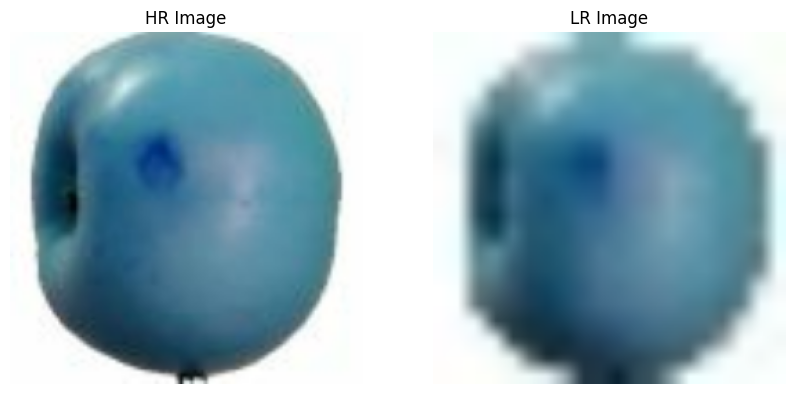

HR shape: (256, 256, 3), LR shape: (64, 64, 3)


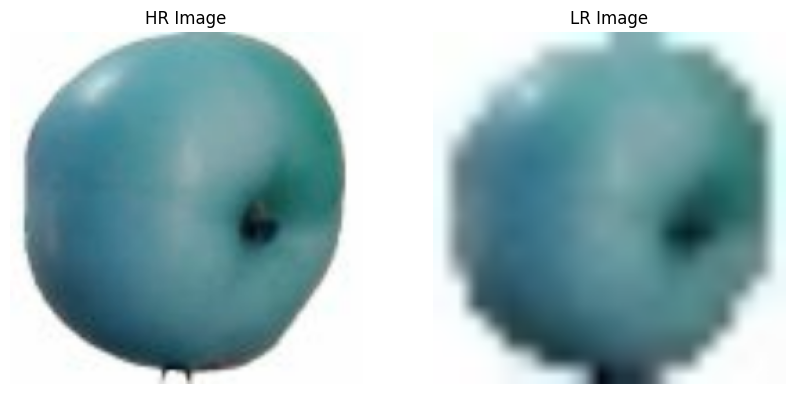

In [30]:


# Assuming dataset is a batch of images (like from a tf.data.Dataset)
i = 0
for img_batch_lr, img_batch_hr in dataset:  # Assuming you have the dataset loaded

    # Convert to numpy array if using TensorFlow
    img_hr = img_batch_hr[0].numpy()
    img_lr = img_batch_lr[0].numpy()

    # Print image shapes for debugging
    print(f"HR shape: {img_hr.shape}, LR shape: {img_lr.shape}")

    # Ensure the images have values in the expected range (0-255 for uint8 images)
    if img_lr.dtype != np.uint8:
        img_lr = np.clip(img_lr, 0, 255).astype(np.uint8)
    if img_hr.dtype != np.uint8:
        img_hr = np.clip(img_hr, 0, 255).astype(np.uint8)

    # Resize LR image to match HR size
    img_lr_resize = cv2.resize(img_lr, (img_hr.shape[1], img_hr.shape[0]))

    # Ensure images are in the correct format for matplotlib (RGB)
    img_lr_resize_rgb = cv2.cvtColor(img_lr_resize, cv2.COLOR_BGR2RGB)
    img_hr_rgb = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)

    # Display the images side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    ax[0].imshow(img_hr_rgb)
    ax[0].set_title("HR Image")
    ax[0].axis('off')

    ax[1].imshow(img_lr_resize_rgb)
    ax[1].set_title("LR Image")
    ax[1].axis('off')

    plt.show()

    if i > 6:
        break

    i += 1



### Initialization

In [31]:
model_gen = generator_model((64, 64, 3))
model_dis = discriminator_model((256, 256, 3))
model_vgg = vgg19_model((256, 256, 3))

In [32]:
g_optimizer_init = tf.optimizers.Adam(learning_rate)
g_optimizer = tf.optimizers.Adam(learning_rate)
d_optimizer = tf.optimizers.Adam(learning_rate)

## Initialize Generator

Lets give generator head start by letting it train alone for some steps

In [33]:
from PIL import Image

g_optimizer_init = tf.optimizers.Adam(0.0002)

# Lets run generator for initial epochs
for epoch in range(n_epoch_init):
    for step, (X, Y) in enumerate(dataset):

        if step > steps_per_epoch:
            break

        with tf.GradientTape() as tape:
            Y_pred = model_gen(X)

            # Our loss function is MSE of pixel differences in actual and generated image
            mse_loss = tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(Y, Y_pred), axis=-1))
            grad = tape.gradient(mse_loss, model_gen.trainable_weights)
            g_optimizer_init.apply_gradients(zip(grad, model_gen.trainable_weights))

        if step % 100 == 0:
            print("Epoch: [{}/{}] step, mse: {:.3f} ".format(epoch, step , mse_loss))

        if step == 0:
            img = model_gen.predict(X[0:1])[0]
            #img = Image.fromarray(np.uint8(img * 255))
            img = Image.fromarray(np.uint8(img))
            img.save(os.path.join(img_save_dir, '{}_g_init.png'.format(epoch)))

Epoch: [0/0] step, mse: 550965739520.000 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
Epoch: [1/0] step, mse: 6998983168.000 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Epoch: [2/0] step, mse: 488212096.000 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Epoch: [3/0] step, mse: 118057984.000 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Epoch: [4/0] step, mse: 65980472.000 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Found 5 images.
Loaded 5 images.


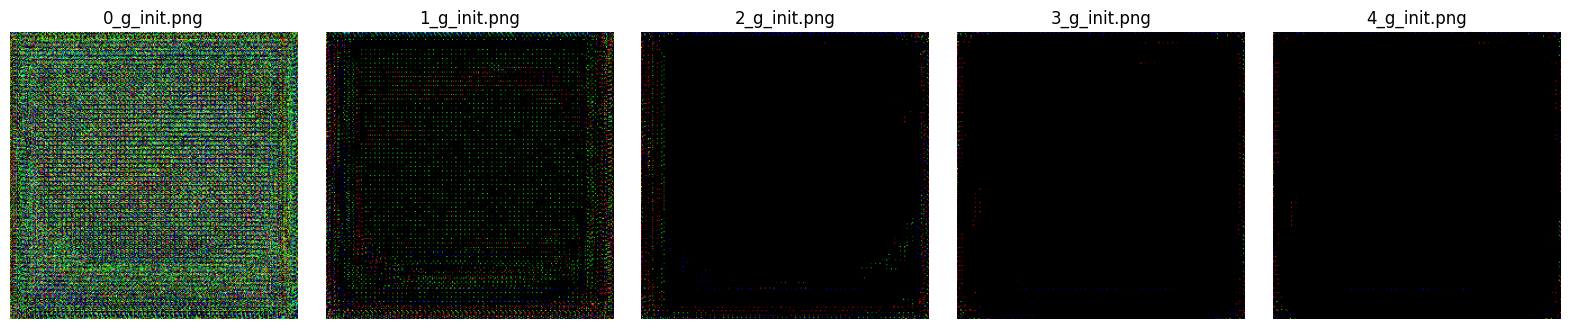

In [35]:
# Function to plot images
def plot_images(images, titles, figsize, rows=1, cols=1, axes_pad=(0.1, 0.5)):
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(rows, cols, figure=fig, wspace=axes_pad[0], hspace=axes_pad[1])

    for i, (img, title) in enumerate(zip(images, titles)):
        ax = fig.add_subplot(grid[i])
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis('off')

    plt.show()

# Directory to check
img_save_dir = r"C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\samples"  ######### please change to your path #########

# Get all file paths
sample_images_filepaths = [os.path.join(img_save_dir, x) for x in os.listdir(img_save_dir)]
sample_images_filepaths = list(filter(lambda x: not 'train' in x, sample_images_filepaths))

# Check if there are images to process
if not sample_images_filepaths:
    print("No images found in the directory.")
else:
    print(f"Found {len(sample_images_filepaths)} images.")

# Sort the paths (based on the first element before '_')
sample_images_filepaths.sort(key=lambda x: x.split('_')[0])

# Load images and titles
images = [cv2.imread(x) for x in sample_images_filepaths]
titles = [os.path.basename(x) for x in sample_images_filepaths]

# Ensure all images are loaded
if not all(img is not None for img in images):
    print("Some images could not be loaded. Please check the file paths.")
else:
    print(f"Loaded {len(images)} images.")

# Plot if images exist
if images:
    plot_images(images, titles, figsize=(20., 8.), rows=1, cols=len(images))
else:
    print("No images to display.")


In [ ]:


##### fix high vram usage 

for epoch in range(n_epoch):
    for step, (X, Y) in enumerate(dataset):
        
        if step > steps_per_epoch:
            break

        with tf.GradientTape(persistent=True) as tape:
            fake_img = model_gen(X)
            # Only calculate generator loss, skip discriminator loss for now
            fake_logits = model_dis(fake_img)
            real_logits = model_dis(Y)
            
            # Disable feature extraction to save VRAM
            # fake_feature = model_vgg(fake_img)
            # real_feature = model_vgg(Y)

            # Discriminator loss (commented out for VRAM savings)
            d_loss1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(fake_logits, tf.zeros_like(fake_logits)))
            d_loss2 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(real_logits, tf.ones_like(real_logits)))
            d_loss = d_loss1 + d_loss2

            # Generator loss
            g_gan_loss = 2e-3 * tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(fake_logits, tf.ones_like(fake_logits)))
            mse_loss = 2e-1 * tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(fake_img, Y), axis=-1))
            # VGG loss (commented out for VRAM savings)
            # vgg_loss = 2e-6 * tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(fake_feature, real_feature), axis=-1))
            g_loss = mse_loss + g_gan_loss  # Just use MSE and GAN loss for testing
            
            # Gradients calculation
            grad = tape.gradient(g_loss, model_gen.trainable_weights)
            g_optimizer.apply_gradients(zip(grad, model_gen.trainable_weights))

            # Discriminator gradients (optional for testing)
            # grad = tape.gradient(d_loss, model_dis.trainable_weights)
            # d_optimizer.apply_gradients(zip(grad, model_dis.trainable_weights))

        if step % 100 == 0:
            print("Epoch: [{}/{}] step: D.loss: {:.3f}: G.loss: {:.3f}".format(epoch, step, d_loss, g_loss))

        # Remove image saving for now to avoid VRAM usage
        if step == 0:
            img = model_gen.predict(X[0:1])[0]
            img = Image.fromarray(np.uint8(img))
            img.save(os.path.join(img_save_dir, '{}_g_train.png'.format(epoch)))

# Save the model after training
model_gen.save('generator_init.h5')
print("Model saved as 'generator_init.h5")

Epoch: [0/0] step: D.loss: 1.100: G.loss: 7297804.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
Epoch: [1/0] step: D.loss: 1.100: G.loss: 214861.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Epoch: [2/0] step: D.loss: 1.100: G.loss: 7318.074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Epoch: [3/0] step: D.loss: 1.100: G.loss: 6280.337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Epoch: [4/0] step: D.loss: 1.100: G.loss: 6280.337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Epoch: [5/0] step: D.loss: 1.100: G.loss: 6280.337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Epoch: [6/0] step: D.loss: 1.100: G.loss: 6280.337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Epoch: [7/0] step: D.loss: 1.100: G.loss: 6280.337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Epoch: [8/0] step: D.loss: 1.100: G.loss: 6280.337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Epoch: [9/0] step: D.loss: 1.100: G.loss: 6280.337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Model saved as 'generator_init.h5'


In [37]:
# Define two tensors representing images (or data) with shape (2, 2, 3)
fake_img = tf.constant([[[1, 6, 3], [4, 5, 6]],
                        [[7, 8, 9], [10, 11, 12]]])

Y = tf.constant([[[2, 3, 4], [5, 6, 7]],
                 [[8, 9, 10], [11, 12, 13]]])

# Print the shape of the target tensor Y (should be (2, 2, 3))
print(Y.shape)

# Print a separator for readability
print("====================")

# Compute the element-wise squared difference between fake_img and Y
# This will give a tensor of the same shape (2, 2, 3) where each element is the square of the difference
# between the corresponding values in fake_img and Y
print(tf.math.squared_difference(fake_img, Y))

# Print a separator for readability
print("====================")

# Compute the mean squared difference along the last axis (axis=-1) which represents the color channels
# This reduces the shape from (2, 2, 3) to (2, 2) by averaging the squared differences across the 3 channels
print(tf.reduce_mean(tf.math.squared_difference(fake_img, Y), axis=-1))

# Calculate the Mean Squared Error (MSE) loss by averaging the values computed in the previous step
# This reduces the shape from (2, 2) to a single scalar value (overall average squared error)
mse_loss = tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(fake_img, Y), axis=-1))

# Print the final MSE loss value
mse_loss


(2, 2, 3)
tf.Tensor(
[[[1 9 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]], shape=(2, 2, 3), dtype=int32)
tf.Tensor(
[[3 1]
 [1 1]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(), dtype=int32, numpy=1>

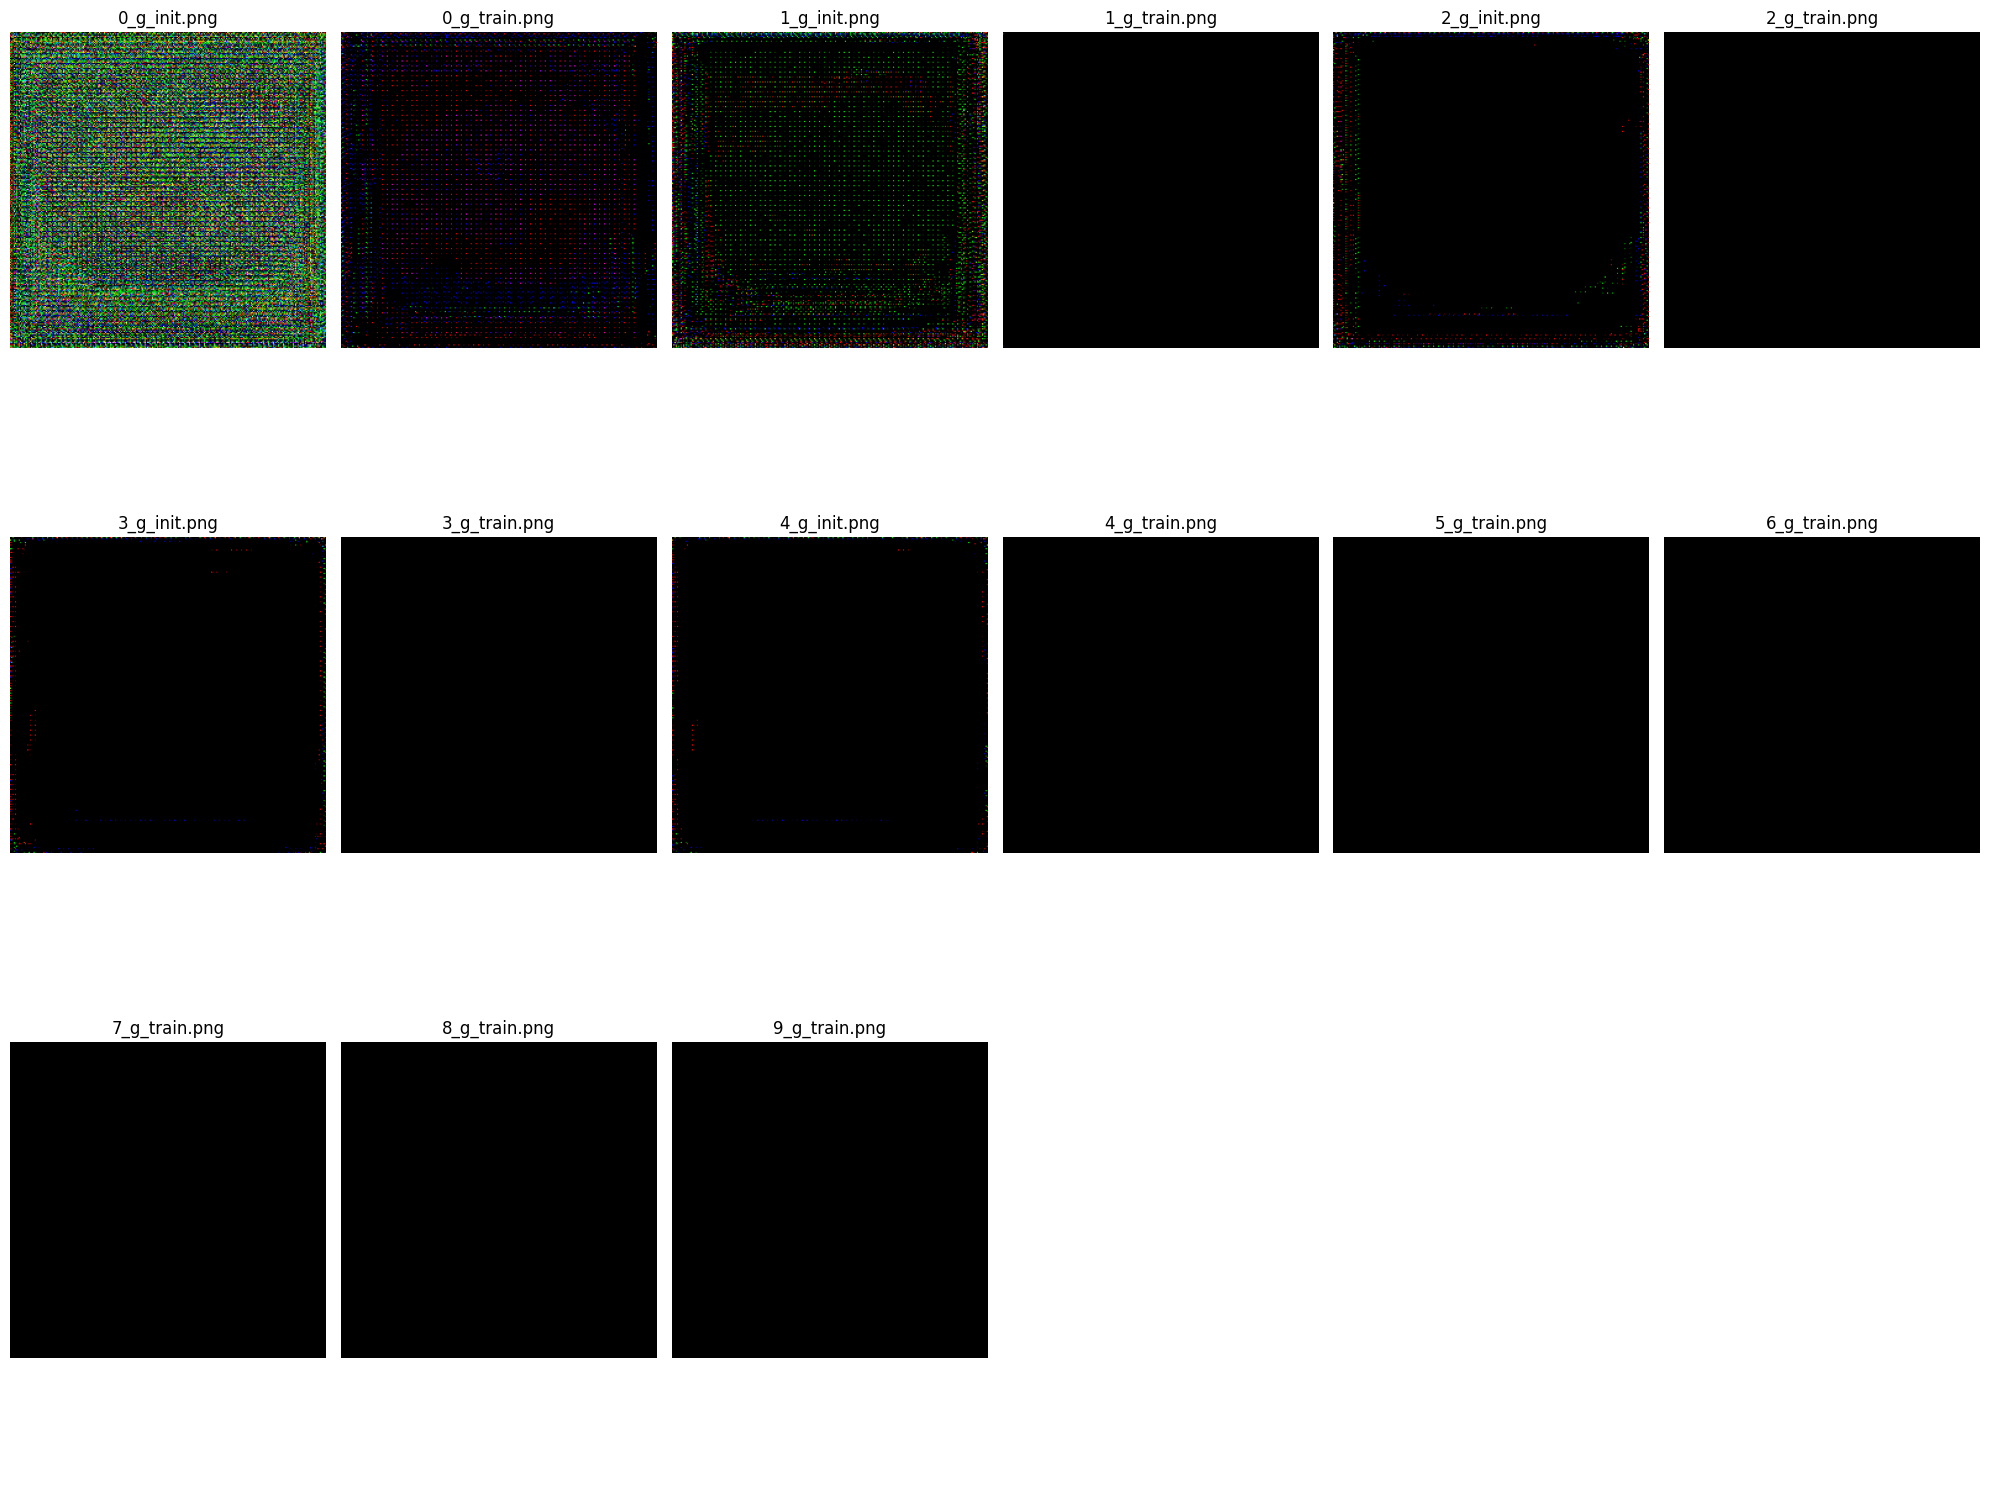

In [39]:
##### if using local only 

# Directory containing images
img_save_dir = r"C:\Users\omarh\Documents\College\Year 4 Term 2\Final-Year-Project\samples"  ######### Change to your path #########

# Get list of image file paths in the folder
sample_images_filepaths = [os.path.join(img_save_dir, x) for x in os.listdir(img_save_dir) if x.endswith(('.jpg', '.png', '.jpeg'))]

# Sort the images based on their filenames
# This handles both numeric and non-numeric filenames
def safe_sort_key(x):
    # Try to extract an integer from the filename, default to 0 if it fails
    try:
        return int(x.split('_')[0])  # Extract the first part and try to convert it to an integer
    except ValueError:
        return float('inf')  # If it fails, return a large number to sort these files last

# Sort file paths safely based on the extracted integers
sample_images_filepaths.sort(key=safe_sort_key)

# Read images into a list
images = [cv2.imread(x) for x in sample_images_filepaths]

# Convert BGR to RGB for proper display in matplotlib
images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

# Get the titles for each image (you can modify this based on your file naming convention)
titles = [os.path.basename(x) for x in sample_images_filepaths]

# Set up a grid for displaying images
n_images = len(images_rgb)
cols = 6  # You can change this to whatever fits your display
rows = (n_images // cols) + (n_images % cols > 0)  # Calculate rows based on number of images

# Create subplots to display images in a grid
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Display images in the grid
for i, (img, title) in enumerate(zip(images_rgb, titles)):
    axes[i].imshow(img)
    axes[i].set_title(title)
    axes[i].axis('off')

# Hide unused axes if there are any
for i in range(n_images, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## References

> https://learnopencv.com/super-resolution-in-opencv/<br>
> https://www.kaggle.com/code/akhileshdkapse/sr-super-resolution-gan-keras
